In [1]:
from scripts.constants import SimulationConstants
from scripts.epidemic_metrics import dead_ratio, infected_ratio
%load_ext autoreload
%autoreload 2

from scripts.simulation import init_run_simulation
import scripts.visualization as viz

viz.load_matplotlib()
plt = viz.plt

In [2]:
contants = SimulationConstants()
metrics = {'dead_ratio': ('l1_layer', dead_ratio),
            'infected_ratio': ('l1_layer', infected_ratio)}

contants.n_agents = 100
contants.n_steps = 20000

out1, _, _ =  init_run_simulation(contants.n_agents,
                    contants.n_additional_virtual_links,
                    contants.init_infection_fraction,
                    contants.init_aware_fraction,
                    contants.n_steps,
                    contants.l1_params,
                    contants.l2_params,
                    contants.l2_voter_params,
                    contants.l2_social_media_params,
                    metrics)

In [3]:
contants.n_agents = 1000
contants.n_steps = 20000

out2, _, _ =  init_run_simulation(contants.n_agents,
                    contants.n_additional_virtual_links,
                    contants.init_infection_fraction,
                    contants.init_aware_fraction,
                    contants.n_steps,
                    contants.l1_params,
                    contants.l2_params,
                    contants.l2_voter_params,
                    contants.l2_social_media_params,
                    metrics)


In [5]:
%%time

contants.n_agents = 5000
contants.n_steps = 100000 # ~100k is ok -- around 3 minutes

out3, _, _ =  init_run_simulation(contants.n_agents,
                    contants.n_additional_virtual_links,
                    contants.init_infection_fraction,
                    contants.init_aware_fraction,
                    contants.n_steps,
                    contants.l1_params,
                    contants.l2_params,
                    contants.l2_voter_params,
                    contants.l2_social_media_params,
                    metrics)

CPU times: user 3min 22s, sys: 11.8 ms, total: 3min 22s
Wall time: 3min 22s


In [6]:
%%time

contants.n_agents = 10000
contants.n_steps = 150000

# around 12 min -- single realisation for N_STEPS = 150k
out4, _, _ =  init_run_simulation(contants.n_agents,
                    contants.n_additional_virtual_links,
                    contants.init_infection_fraction,
                    contants.init_aware_fraction,
                    contants.n_steps,
                    contants.l1_params,
                    contants.l2_params,
                    contants.l2_voter_params,
                    contants.l2_social_media_params,
                    metrics)

CPU times: user 11min 36s, sys: 196 ms, total: 11min 36s
Wall time: 11min 36s


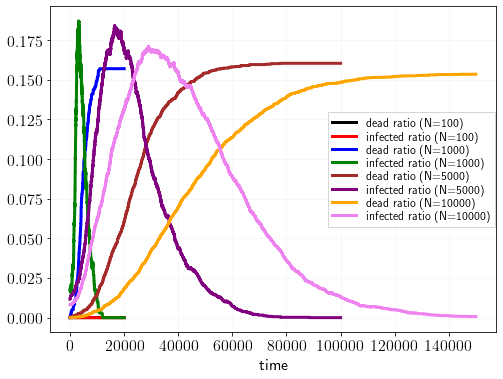

In [10]:
plt.grid(alpha=0.1)

plt.plot(out1['dead_ratio'], color='black', linewidth=3, label='dead ratio (N=100)')
plt.plot(out1['infected_ratio'], color='red', linewidth=3, label='infected ratio (N=100)')

plt.plot(out2['dead_ratio'], color='blue', linewidth=3, label='dead ratio (N=1000)')
plt.plot(out2['infected_ratio'], color='green', linewidth=3, label='infected ratio (N=1000)')

plt.plot(out3['dead_ratio'], color='brown', linewidth=3, label='dead ratio (N=5000)')
plt.plot(out3['infected_ratio'], color='purple', linewidth=3, label='infected ratio (N=5000)')

plt.plot(out4['dead_ratio'], color='orange', linewidth=3, label='dead ratio (N=10000)')
plt.plot(out4['infected_ratio'], color='violet', linewidth=3, label='infected ratio (N=10000)')

plt.xlabel('time')
plt.legend(loc='center right', borderaxespad=0.1, fontsize=12, ncol=1,
           labelspacing=0.02, fancybox=False, columnspacing=0.3)
# plt.savefig("../plots/measure_n_steps_n_agents.pdf")